In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [17]:
df = pd.read_csv("covid.csv")

df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,4/5/20,2/5/20,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,6/4/20,1/4/20,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10/4/20,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [18]:
# Shape of the dataframe

print(df.shape)


(566602, 23)


# Data Cleaning

In [19]:
# Drop entry_date and date_symptoms columns

clean_df = df.drop(columns = ['entry_date', 'date_symptoms'])

clean_df.head()

,id,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,9999-99-99,97,2,27,97,2,2,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,9999-99-99,97,2,24,97,2,2,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,9999-99-99,2,2,54,2,2,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,9999-99-99,2,1,30,97,2,2,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,22-04-2020,2,2,60,2,1,2,...,2,1,2,1,2,2,2,99,1,2


In [20]:
# Delete records where Covid results are pending (There are 66910 records for pending results)

clean_df.drop(clean_df[clean_df['covid_res'] == 3].index, inplace = True)

clean_df.shape

(499692, 21)

In [21]:
# Check for any duplicate patient id's

duplicate = clean_df[clean_df.duplicated('id')]

print(f"There are {len(duplicate)} duplicate patient id's")

There are 2856 duplicate patient id's


In [22]:
# Drop all the duplictae patient id's

clean_df.drop_duplicates(subset='id', keep='first', inplace=True)

clean_df.shape

(496836, 21)

In [25]:
# Convert the 'date_died' column to mm/dd/yyyy format

clean_df['date_died'] = pd.to_datetime(clean_df['date_died'], errors = 'coerce').dt.strftime('%x')

clean_df.head(10)

,id,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,NaN,97,2,27,97,2,2,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,NaN,97,2,24,97,2,2,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,NaN,2,2,54,2,2,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,NaN,2,1,30,97,2,2,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,04/22/20,2,2,60,2,1,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,04/29/20,2,1,47,97,1,2,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,NaN,2,2,63,97,2,2,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,NaN,97,2,56,2,2,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,NaN,97,2,41,2,2,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,NaN,1,1,39,2,2,2,...,2,2,2,2,1,2,2,99,1,2


In [28]:
# Change date_died column to categorical data as follows:
# "9999-99-99" (or NaN) to 0 
# valid death dates rows to 1

clean_df['date_died'] = clean_df['date_died'].fillna(0)

clean_df.loc[clean_df.date_died != 0, "date_died"] = 1

clean_df.head(10)

,id,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,0,97,2,27,97,2,2,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,0,97,2,24,97,2,2,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,0,2,2,54,2,2,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,0,2,1,30,97,2,2,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,1,2,2,60,2,1,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,1,2,1,47,97,1,2,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,0,2,2,63,97,2,2,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,0,97,2,56,2,2,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,0,97,2,41,2,2,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,0,1,1,39,2,2,2,...,2,2,2,2,1,2,2,99,1,2


# Data Exploration

In [42]:
clean_df.shape

(496836, 21)

In [31]:
clean_df.columns

Index(['id', 'sex', 'patient_type', 'date_died', 'intubed', 'pneumonia', 'age',
       'pregnancy', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'covid_res', 'icu'],
      dtype='object')

In [32]:
clean_df.head(15)

,id,sex,patient_type,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,0,97,2,27,97,2,2,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,0,97,2,24,97,2,2,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,0,2,2,54,2,2,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,0,2,1,30,97,2,2,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,1,2,2,60,2,1,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,1,2,1,47,97,1,2,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,0,2,2,63,97,2,2,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,0,97,2,56,2,2,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,0,97,2,41,2,2,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,0,1,1,39,2,2,2,...,2,2,2,2,1,2,2,99,1,2


In [33]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496836 entries, 0 to 499691
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   496836 non-null  object
 1   sex                  496836 non-null  int64 
 2   patient_type         496836 non-null  int64 
 3   date_died            496836 non-null  object
 4   intubed              496836 non-null  int64 
 5   pneumonia            496836 non-null  int64 
 6   age                  496836 non-null  int64 
 7   pregnancy            496836 non-null  int64 
 8   diabetes             496836 non-null  int64 
 9   copd                 496836 non-null  int64 
 10  asthma               496836 non-null  int64 
 11  inmsupr              496836 non-null  int64 
 12  hypertension         496836 non-null  int64 
 13  other_disease        496836 non-null  int64 
 14  cardiovascular       496836 non-null  int64 
 15  obesity              496836 non-nu

In [34]:
# How many female patients are pregnant

x = clean_df.loc[(clean_df.sex == 1) & (clean_df.pregnancy == 1)]
print(len(x))

3601


In [35]:
# How many Covid positive patients were tobacco users

x = clean_df.loc[(clean_df.covid_res == 2) & (clean_df.tobacco == 1)]
print(len(x))

25635


# Finding value counts of categorical variables

CLAVE	DESCRIPCIÓN
1	YES
2	NO
97	Not Applicable
98	Ignore
99	Not Specified

1	Female
2	Male
99	Not Specified

In [36]:
# Create a subset of categorical variables only
subset = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [37]:
for col in subset.columns:
    print(subset[col].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64
2     493790
1      70831
98      1981
Name: diabetes, dtype: int64
2     555723
1       9130
98      1749
Name: copd, dtype: int64
2     546824
1      18026
98      1752
Name: asthma, dtype: int64
2     555644
1       8978
98      1980
Name: inmsupr, dtype: int64
2     472270
1      92508
98      1824
Name: hypertension, dtype: int64
2     546920
1      17084
98      2598
Name: other_disease, dtype: int64
2     552005
1      12775
98      1822
Name: cardiovascular, dtype: int64
2     472549
1      92272
98      1781
Name: obesity, dtype: int64
2     553560
1      11250
98      1792
Name: renal_chronic, dtype: int64
2     516678
1      48017
98      1907
N

In [38]:
clean_df['date_died'].value_counts()

0    462861
1     33975
Name: date_died, dtype: int64

In [39]:
clean_df["date_died"] = clean_df["date_died"].astype("int64")

# Visualization

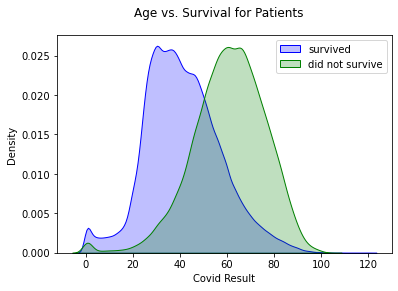

In [40]:
# Plotting Age vs Survival rate of Patients Admitted to the hospital
fig, ax = plt.subplots()

sns.kdeplot(clean_df[clean_df["date_died"]==0]["age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(clean_df[clean_df["date_died"]==1]["age"], shade=True, color="green", label="did not survive", ax=ax)

ax.legend()
ax.set_xlabel("Covid Result")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Patients");

# We see from the above graph that Age cannot be considered a factor for Covid deaths

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

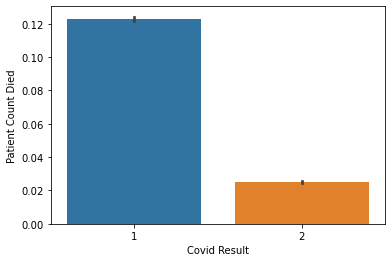

In [41]:
# Plotting Patient Count Died versus Covid Result
ax = sns.barplot(x="covid_res", y="date_died", data=clean_df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Count Died")
ax.set_xticklabels(["positive", "not positive", "pending"])

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (3).

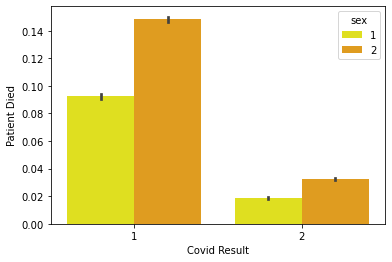

In [678]:
# Plotting Male/Female Patient Count Died vs Covid Result"
ax = sns.barplot(x="covid_res", y="date_died", hue="sex", palette={1:"yellow", 2:"orange"}, data=clean_df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Died")
ax.set_xticklabels(["positive", "not positive", "pending"])

In [679]:
# Create new dataframe with only pre-existing conditions
pre_existing_df = subset.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])

In [680]:
# len(df[df.sex == 1].index)
pre_existing_count = []
pre_existing_labels = []
for col in pre_existing_df.columns:
    pre_existing_count.append(len(pre_existing_df[pre_existing_df[col] == 1].index))
    pre_existing_labels.append(col)

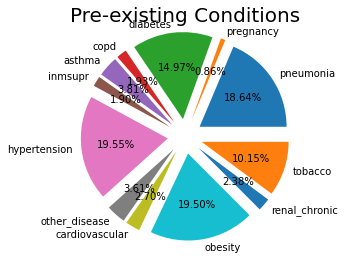

In [681]:
# Plotting precentage of pre-exsiting conditions in the dataset
plt.pie(pre_existing_count,labels = pre_existing_labels,autopct = '%.2f%%', explode=[0.2]*12)
plt.title('Pre-existing Conditions', fontsize = 20)
plt.show()

In [682]:
# Plotting Patient who were in contact with other covid patients versus Covid Result


# Machine Learning

In [685]:
# Create our features
X = clean_df.drop(columns= ['date_died', 'id'])

# Create our target
y = clean_df['date_died']

In [686]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [687]:
X.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000,496836.000000
mean,1.506527,1.215383,76.543978,1.844474,42.549308,50.369832,2.191109,2.261891,2.245230,2.303241,2.123872,2.390386,2.267768,2.118699,2.263980,2.218229,31.447081,1.557431,76.544373
std,0.499958,0.411088,39.072715,0.584639,16.640536,47.502113,5.515123,5.165043,5.160214,5.530496,5.260690,6.349501,5.277259,5.223763,5.217089,5.406946,45.031760,0.496691,39.072202
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000,99.000000


In [688]:
y.value_counts()

0    462861
1     33975
Name: date_died, dtype: int64

# Balanced Random Forest Classifier

In [689]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier(n_estimators =100, random_state=1)
brfc_model.fit(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score
y_pred = brfc_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [690]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

ModuleNotFoundError: No module named 'imblearn'

In [691]:
# List the features sorted in descending order by feature importance
features = pd.Series(data=brfc_model.feature_importances_,index=X.columns)
features.sort_values(ascending=False,inplace=True)
print(features)

NameError: name 'brfc_model' is not defined

# Easy Ensemble AdaBoost Classifier